In [2]:
import math
import numpy as np
from statistics import mean
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [3]:
df=sc.textFile('s3://geocluster/devicestatus.csv')


In [4]:
df=df.map(lambda x:x.split(',')).cache()

In [5]:
latlongdf=df.map(lambda x:(int(x[0]),float(x[1]),float(x[2])))

In [6]:
def Great_circle(lat1,lon1,lat2,lon2):
    radius = 6371;

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

def Euclidean(lat1,lat2, lon1,lon2):
    d_length = 110.25
    x= lat2 - lat1
    y= (lon2 - lon1)*math.cos(math.radians(lat1))
    return d_length*math.sqrt(x*x + y*y)

def Centroid(old,new):
    return [math.sqrt((old[i][0]-new[i][0])**2+(old[i][1]-new[i][1])**2) for i in range(0,k)]

def Equality(old,new):
    for i in range(0,k):
        if(old[i][0]!=new[i][0] or old[i][1]!=new[i][1]):
            return False;
    return True;




In [13]:
k=5
distance="Great_circle"
iterations=50
convergedistance=0.01
ic=latlongdf.map(lambda x:(x[1],x[2])).takeSample(False, k);
output=[];
output.extend(ic);

for i in range(0,iterations):
    if(distance=="euclidean"):
        rddce=latlongdf.map(lambda x:(x[0],x[1],x[2],[Euclidean(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,k)],np.argmin([Euclidean(x[1],x[2],ic[j][0],ic[j][1]) for j in range(k)])))
        rdddist=latlongdf.map(lambda x:(np.argmin([Euclidean(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,k)]),(x[1],x[2])))
    elif(distance=="Great_circle"):
        rddce=latlongdf.map(lambda x:(x[0],x[1],x[2],[Great_circle(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,k)],np.argmin([Great_circle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(k)])))
        rdddist=latlongdf.map(lambda x:(np.argmin([Great_circle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,k)]),(x[1],x[2])))
    rddist=rdddist.groupByKey().map(lambda x:(mean([k[0] for k in x[1]]),mean([k[1] for k in x[1]]))) 
    old=ic;
    new=rddist.collect();
    if(len(new)<k):
        diff=(k-len(new));
        exclus=latlongdf.map(lambda x:(x[1],x[2])).takeSample(False,diff);
        new.extend(exclus)
    dist=sum(Centroid(old,new))
    if(dist<=convergedistance or Equality(old,new)):
        print(dist)
        break;
    else:
        ic=new;
        output.extend(ic)
        print(ic)
        
        

[(34.230671077391406, -117.89840219679488), (37.26976626430316, -120.81746705758708), (43.76604279036912, -121.23927842013727), (35.050209161935605, -113.14720465378869), (38.693336352876074, -121.5732225457581)]


[(34.192213737463355, -117.73535141919702), (38.76778160412744, -121.38219389024398), (43.97209882600633, -121.37756018274166), (35.08536417692332, -112.63995073602707), (36.99130063026776, -120.70977581193924)]


[(34.19394057515265, -117.70945780808826), (36.903815234878294, -120.66666428956114), (44.138834013322786, -121.6304785462305), (35.08461054210144, -112.57140921184946), (38.788858690344334, -121.24120801831171)]


[(34.19394057515265, -117.70945780808826), (44.239260865198396, -121.7958063122461), (38.815857368335486, -121.15952701960067), (36.87262515341334, -120.6731590465001), (35.08461054210144, -112.57140921184946)]


[(34.19394057515265, -117.70945780808826), (38.82478712093355, -121.13541553238592), (35.07593924508569, -112.56744613547095), (44.239260865198396, -121.7958063122461), (36.87509158007414, -120.70267641610606)]


[(34.19394057515265, -117.70945780808826), (35.06928029090422, -112.56441907372972), (36.884884594845104, -120.72377081824689), (38.83572332814558, -121.11942630372927), (44.239260865198396, -121.7958063122461)]


[(34.19394057515265, -117.70945780808826), (36.89766782056632, -120.74278050720308), (44.239260865198396, -121.7958063122461), (35.06495647937617, -112.56245748083212), (38.84787546378504, -121.10694892289993)]


[(34.19394057515265, -117.70945780808826), (38.86030903798171, -121.09481042880046), (44.239260865198396, -121.7958063122461), (35.05931232043651, -112.55989552700834), (36.911180979916615, -120.75876018514325)]


[(34.19394057515265, -117.70945780808826), (44.239260865198396, -121.7958063122461), (36.92435767456112, -120.77460746624118), (38.87294154242555, -121.08028868820232), (35.05162885405635, -112.55646254125313)]


[(34.19394057515265, -117.70945780808826), (36.93558683443616, -120.78883108281426), (35.043649414157116, -112.55285122252157), (44.239260865198396, -121.7958063122461), (38.8840400152263, -121.06560597394184)]


[(34.19394057515265, -117.70945780808826), (38.89653722066494, -121.04425821045672), (35.02996918230758, -112.54670596725674), (44.239260865198396, -121.7958063122461), (36.94739244389016, -120.80449645009504)]


[(34.19394057515265, -117.70945780808826), (36.96243780161008, -120.82549122236732), (35.01291556400367, -112.53905744906433), (44.239260865198396, -121.7958063122461), (38.912637495997934, -121.01571055861582)]


[(34.19394057515265, -117.70945780808826), (38.93821919120632, -120.96826377799037), (34.987038893421854, -112.52754112007996), (44.239260865198396, -121.7958063122461), (36.985821200835304, -120.8599408334281)]


[(34.19399228004183, -117.70948847342079), (34.93349162847968, -112.5041887636449), (37.01730921284351, -120.9040982066589), (38.97522346284748, -120.88412082819876), (44.239260865198396, -121.7958063122461)]


[(34.19456473744066, -117.70983107216905), (37.06494443791874, -120.96695318631834), (44.239260865198396, -121.7958063122461), (34.80992191521375, -112.45011145064151), (39.03333638645948, -120.71145192581808)]


[(34.196248462430255, -117.71085049030695), (44.239260865198396, -121.7958063122461), (39.1366381201755, -120.40187970258162), (37.15502024370197, -121.07624107948821), (34.62404875539812, -112.37298078246751)]


[(34.201520876964956, -117.71413296225782), (39.297049522767885, -120.04630644000652), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461), (37.3083586038597, -121.22470515366345)]


[(34.217250285028555, -117.72423813052664), (34.59079985021841, -112.35948086859702), (37.47184187811023, -121.3423280773727), (39.46465675039147, -119.60079391943125), (44.239260865198396, -121.7958063122461)]


[(34.23889497742526, -117.73911990674718), (37.57408420113626, -121.34817629951624), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702), (39.625565887699594, -119.35900005311933)]


[(34.25329122222707, -117.75213646142238), (44.239260865198396, -121.7958063122461), (39.77484413864067, -119.11859332777146), (37.65622608360006, -121.33836338162915), (34.59079985021841, -112.35948086859702)]


[(34.26536126800781, -117.76463535067572), (39.847648421164386, -118.90260141387604), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461), (37.71961461552756, -121.34654708475311)]


[(34.27603475729894, -117.77709119689496), (34.59079985021841, -112.35948086859702), (37.77306063420198, -121.3718407208942), (39.84393997223474, -118.70872905131037), (44.239260865198396, -121.7958063122461)]


[(34.28716079648913, -117.78992407969076), (37.81889607779932, -121.38845478648354), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702), (39.846476671687924, -118.55075562416074)]


[(34.297646463551644, -117.8042972359536), (39.868726797784205, -118.42460337097378), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702), (37.858959872559524, -121.39360711203142)]


[(34.305640990342376, -117.81542153687654), (37.89685759773313, -121.39252464316876), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702), (39.89514411780615, -118.27593437792035)]


[(34.31206108914002, -117.82517946836106), (39.931177366206725, -118.06608972210778), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702), (37.938745979937174, -121.38452926390323)]


[(34.31769327475639, -117.8339794365983), (44.239260865198396, -121.7958063122461), (37.98053221428139, -121.37309281879506), (39.970354886449535, -117.81266272409086), (34.59079985021841, -112.35948086859702)]


[(34.322413846314355, -117.84151663953766), (38.01140813611783, -121.36284721595632), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461), (40.003723691619854, -117.6097424275356)]


[(34.32631470974502, -117.84800737215438), (40.04747467185082, -117.49009516327595), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461), (38.029681287529485, -121.35267377623788)]


[(34.32917821555825, -117.8528976860805), (38.04545703527375, -121.34116148036733), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461), (40.093483839162616, -117.3686442377214)]


[(34.33134329127008, -117.85625458667117), (34.59079985021841, -112.35948086859702), (40.156142862772484, -117.19186218410661), (38.06290022043153, -121.32471637017974), (44.239260865198396, -121.7958063122461)]


[(34.33308380442883, -117.85916122466321), (44.239260865198396, -121.7958063122461), (40.26978344542867, -116.87351645339461), (38.08665093070887, -121.29715906211214), (34.59079985021841, -112.35948086859702)]


[(34.33467217474647, -117.861939022793), (34.59079985021841, -112.35948086859702), (40.39570077956286, -116.4983010947825), (38.10954906862956, -121.2707269131489), (44.239260865198396, -121.7958063122461)]


[(34.33585360206279, -117.8638561043422), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (38.11436066555543, -121.26816941046005)]


[(34.33626789779974, -117.86446209775644), (38.11508179287293, -121.26853898892782), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702)]


[(34.33653545116787, -117.86492457353525), (34.59079985021841, -112.35948086859702), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (38.11561373867382, -121.26875150560642)]


[(34.3365910973691, -117.86496110296761), (38.115668757043075, -121.26881742843906), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461)]


[(34.33662825753409, -117.8650289570041), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (38.11574603896597, -121.26884562749078)]


[(34.33662825753409, -117.8650289570041), (38.11574603896597, -121.26884562749078), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702)]


[(34.33662825753409, -117.8650289570041), (34.59079985021841, -112.35948086859702), (40.41203041924929, -116.4458467591454), (38.11574603896597, -121.26884562749078), (44.239260865198396, -121.7958063122461)]


[(34.33662825753409, -117.8650289570041), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (38.11574603896597, -121.26884562749078)]


[(34.33662825753409, -117.8650289570041), (38.11574603896597, -121.26884562749078), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702)]


[(34.33662825753409, -117.8650289570041), (34.59079985021841, -112.35948086859702), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (38.11574603896597, -121.26884562749078)]


[(34.33662825753409, -117.8650289570041), (38.11574603896597, -121.26884562749078), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461)]


[(34.33662825753409, -117.8650289570041), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (38.11574603896597, -121.26884562749078)]


[(34.33662825753409, -117.8650289570041), (38.11574603896597, -121.26884562749078), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (44.239260865198396, -121.7958063122461)]


[(34.33662825753409, -117.8650289570041), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (34.59079985021841, -112.35948086859702), (38.11574603896597, -121.26884562749078)]


[(34.33662825753409, -117.8650289570041), (38.11574603896597, -121.26884562749078), (40.41203041924929, -116.4458467591454), (44.239260865198396, -121.7958063122461), (34.59079985021841, -112.35948086859702)]


[(34.33662825753409, -117.8650289570041), (34.59079985021841, -112.35948086859702), (40.41203041924929, -116.4458467591454), (38.11574603896597, -121.26884562749078), (44.239260865198396, -121.7958063122461)]


[Stage 304:>                                                        (0 + 2) / 2]

[(34.33662825753409, -117.8650289570041), (44.239260865198396, -121.7958063122461), (40.41203041924929, -116.4458467591454), (38.11574603896597, -121.26884562749078), (34.59079985021841, -112.35948086859702)]


In [15]:
pd.DataFrame(output).to_csv('s3://geocluster/devicedataGeoK5.csv')

In [16]:
df2=rdddist.map(lambda x:(float(x[0]),x[1][0],x[1][1])).toDF().toPandas()
df2.columns=['index','latitude','longitude']

df3=pd.DataFrame(ic,columns=['latitude','longitude'])

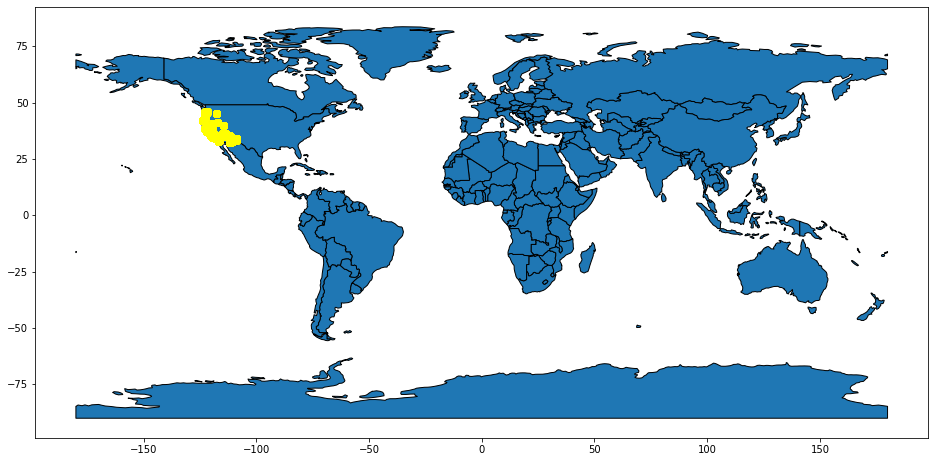

In [17]:
gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.longitude, df2.latitude,df2.index))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

# PLOTTING
gdf.plot(ax=ax,color='yellow')

plt.show()

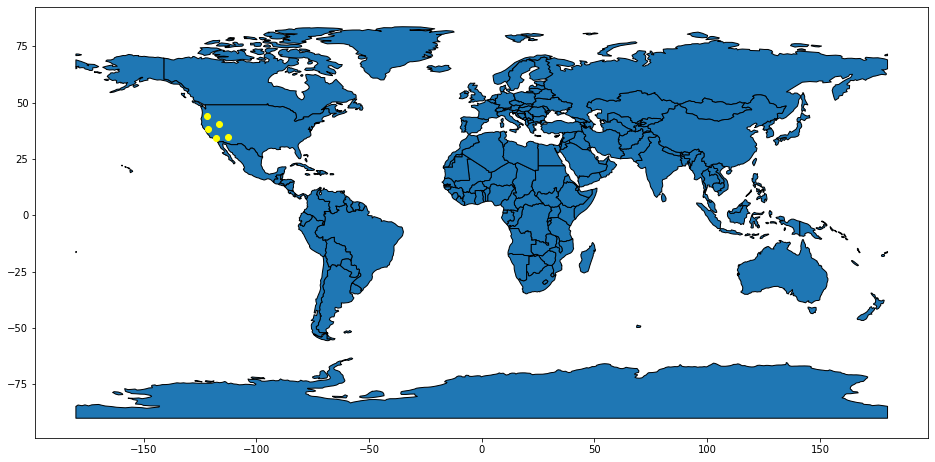

In [18]:
gdf = geopandas.GeoDataFrame(
    df3, geometry=geopandas.points_from_xy(df3.longitude, df3.latitude))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

# PLOTTING.
gdf.plot(ax=ax,color='yellow')

plt.show()